<a href="https://colab.research.google.com/github/TSUParticleModelingGroup/DEFall2020/blob/master/LeapFrog2Body3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

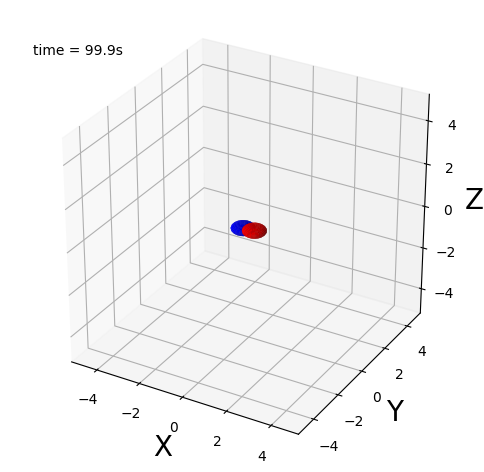

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import mpl_toolkits.mplot3d as plt3d

# Setting up the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 6)
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

# Setting initial positions and velocities
x1 = 2.0
y1 = 0.0
z1 = 0.0

x2 = -2.0
y2 = 0.0
z2 = 0.0

vx1 = 0.0
vy1 = 0.0
vz1 = 5.5

vx2 = 0.0
vy2 = 0.0
vz2 = -5.5

# Setting your time values
tStart = 0
tDuration = 100.0
tStop = tStart + tDuration
dt = 0.1
numberOfTimeSteps = int((tStop - tStart)/dt)

# Setting Masses, Spring strengths, natural lengths and air damping
L = 0.2
K = 20
C1 = 0.05
C2 = 0.05
M1 = 10
M2 = 10

# Creating spheres 
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
radius = 0.5
sphereX = np.cos(u)*np.sin(v)*radius
sphereY = np.sin(u)*np.sin(v)*radius
sphereZ = np.cos(v)*radius*radius
ball1 = ax.plot_surface(sphereX + x1, sphereY + y1, sphereZ + z1, color="r")
ball2 = ax.plot_surface(sphereX + x2, sphereY + y2, sphereZ + z2, color="b")

# Creating line to connect the spheres
line = plt3d.art3d.Line3D((x1, x2), (y1, y2), (z1, z2), color = 'y')
lineObject = ax.add_line(line)

# Creating the time text to put in the window
time_template = 'time = %.1fs'
time_text = ax.text2D(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    global x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, ball1, ball2, lineObject
    ball1.remove()
    ball2.remove()
    lineObject.remove()

    # Finding the force caused by spring
    dx = x2 - x1
    dy = y2 - y1
    dz = z2 - z1
    d = math.sqrt(dx*dx + dy*dy + dz*dz)
    f = K*(d - L)

    # Updating the velocities
    if(i == 0):
      vx1 = vx1 + ((f/M1)*(dx/d) - C1*vx1)*dt/2.0
      vy1 = vy1 + ((f/M1)*(dy/d) - C1*vy1)*dt/2.0
      vz1 = vz1 + ((f/M1)*(dz/d) - C1*vz1)*dt/2.0
      vx2 = vx2 + ((f/M2)*(-dx/d) - C2*vx2)*dt/2.0
      vy2 = vy2 + ((f/M2)*(-dy/d) - C2*vy2)*dt/2.0
      vz2 = vz2 + ((f/M2)*(-dz/d) - C2*vz2)*dt/2.0
    else:
      vx1 = vx1 + ((f/M1)*(dx/d) - C1*vx1)*dt
      vy1 = vy1 + ((f/M1)*(dy/d) - C1*vy1)*dt
      vz1 = vz1 + ((f/M1)*(dz/d) - C1*vz1)*dt
      vx2 = vx2 + ((f/M2)*(-dx/d) - C2*vx2)*dt
      vy2 = vy2 + ((f/M2)*(-dy/d) - C2*vy2)*dt
      vz2 = vz2 + ((f/M2)*(-dz/d) - C2*vz2)*dt
    
    # Updating the positions
    x1 = x1 + vx1*dt
    y1 = y1 + vy1*dt
    z1 = z1 + vz1*dt
    x2 = x2 + vx2*dt
    y2 = y2 + vy2*dt
    z2 = z2 + vz2*dt
    
    ball1 = ax.plot_surface(sphereX + x1, sphereY + y1, sphereZ + z1, color="r")
    ball2 = ax.plot_surface(sphereX + x2, sphereY + y2, sphereZ + z2, color="b")
    line = plt3d.art3d.Line3D((x1, x2), (y1, y2), (z1, z2), color = 'y')
    lineObject = ax.add_line(line)
    time_text.set_text(time_template % (i*dt))
    return lineObject, ball1, ball2, time_text

anim = animation.FuncAnimation(fig, animate, 
                               frames=numberOfTimeSteps, 
                               interval=20,
                               blit=True)

HTML(anim.to_html5_video())